In [257]:
import numpy as np
import pandas as pd
import os

#for splitting 
from sklearn.model_selection import train_test_split

#for preprocessing,metrics evaluation
from sklearn import preprocessing, metrics, cross_validation
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report, cohen_kappa_score

#for scaling
from sklearn.preprocessing import StandardScaler

#models 
#svm
from sklearn import svm
#Randomforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
#Decision Tree
from sklearn.tree import DecisionTreeClassifier 

#Gridsearch
from sklearn.model_selection import GridSearchCV

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [258]:
#change working directory
os.chdir("D:/HoTes/CSC7305c_ML_Hot_2383_Batch49/Datasets")

In [259]:
#Read train and test datasets from csv
hb_data= pd.read_csv("CSE7302c_train.csv", sep=',')
hb_data_test= pd.read_csv("CSE7302c_test.csv", sep=',', na_values="?",  keep_default_na=True)

In [260]:
#Checking train data Dimensions
hb_data.shape

(68636, 30)

In [261]:
#checking train data datatypes
hb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68636 entries, 0 to 68635
Data columns (total 30 columns):
class                       68636 non-null int64
lepton_pT                   68636 non-null float64
lepton_eta                  68636 non-null float64
lepton_phi                  68636 non-null float64
missing_energy_magnitude    68636 non-null float64
missing_energy_phi          68636 non-null float64
jet1pt                      68636 non-null float64
jet1eta                     68636 non-null float64
jet1phi                     68636 non-null float64
jet1b.tag                   68636 non-null float64
jet2pt                      68636 non-null float64
jet2eta                     68636 non-null float64
jet2phi                     68636 non-null float64
jet2b.tag                   68636 non-null float64
jet3pt                      68636 non-null float64
jet3eta                     68636 non-null float64
jet3phi                     68636 non-null float64
jet3b.tag                 

In [262]:
#check test data dimensions
hb_data_test.shape

(29414, 30)

In [263]:
#check test data dimensions
hb_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29414 entries, 0 to 29413
Data columns (total 30 columns):
class                       29414 non-null int64
lepton_pT                   29414 non-null float64
lepton_eta                  29414 non-null float64
lepton_phi                  29414 non-null float64
missing_energy_magnitude    29414 non-null float64
missing_energy_phi          29414 non-null float64
jet1pt                      29414 non-null float64
jet1eta                     29414 non-null float64
jet1phi                     29414 non-null float64
jet1b.tag                   29414 non-null float64
jet2pt                      29414 non-null float64
jet2eta                     29414 non-null float64
jet2phi                     29414 non-null float64
jet2b.tag                   29414 non-null float64
jet3pt                      29414 non-null float64
jet3eta                     29414 non-null float64
jet3phi                     29414 non-null float64
jet3b.tag                 

In [264]:
#changing object to float datatyes in test
test_cols= ["jet4phi","jet4b.tag","m_jj","m_jjj","m_lv","m_jlv","m_bb","m_wbb","m_wwbb"]
hb_data_test[test_cols] = hb_data_test[test_cols].astype('float64')

In [265]:
hb_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29414 entries, 0 to 29413
Data columns (total 30 columns):
class                       29414 non-null int64
lepton_pT                   29414 non-null float64
lepton_eta                  29414 non-null float64
lepton_phi                  29414 non-null float64
missing_energy_magnitude    29414 non-null float64
missing_energy_phi          29414 non-null float64
jet1pt                      29414 non-null float64
jet1eta                     29414 non-null float64
jet1phi                     29414 non-null float64
jet1b.tag                   29414 non-null float64
jet2pt                      29414 non-null float64
jet2eta                     29414 non-null float64
jet2phi                     29414 non-null float64
jet2b.tag                   29414 non-null float64
jet3pt                      29414 non-null float64
jet3eta                     29414 non-null float64
jet3phi                     29414 non-null float64
jet3b.tag                 

In [266]:
#convert target columns into category in train and test
hb_data['class'] = hb_data['class'].astype('category')
hb_data_test['class'] = hb_data_test['class'].astype('category')
print("train target modified datatype:",hb_data['class'].dtypes)
print("test target modified datatype:",hb_data_test['class'].dtypes)

train target modified datatype: category
test target modified datatype: category


In [267]:
#Dopping id columns
hb_data = hb_data.drop('id',1)
hb_data_test = hb_data_test.drop('id',1)
print("train modified dimensions:",hb_data.shape)
print("test modified dimensions:",hb_data_test.shape)

train modified dimensions: (68636, 29)
test modified dimensions: (29414, 29)


In [268]:
#checking null/na values
print("na values in Train \n", hb_data.isna().sum() )
print("na values in Test \n", hb_data_test.isna().sum() )


na values in Train 
 class                       0
lepton_pT                   0
lepton_eta                  0
lepton_phi                  0
missing_energy_magnitude    0
missing_energy_phi          0
jet1pt                      0
jet1eta                     0
jet1phi                     0
jet1b.tag                   0
jet2pt                      0
jet2eta                     0
jet2phi                     0
jet2b.tag                   0
jet3pt                      0
jet3eta                     0
jet3phi                     0
jet3b.tag                   0
jet4pt                      0
jet4eta                     0
jet4phi                     0
jet4b.tag                   0
m_jj                        0
m_jjj                       0
m_lv                        0
m_jlv                       0
m_bb                        0
m_wbb                       0
m_wwbb                      0
dtype: int64
na values in Test 
 class                       0
lepton_pT                   0
lepton_eta      

In [269]:
#dropping na from test as they exists in only one row
hb_data_test.dropna(inplace=True)


In [270]:
hb_data_test.shape

(29413, 29)

In [271]:
print("na values in Train \n", hb_data.isna().sum() )
print("na values in Test \n", hb_data_test.isna().sum() )

na values in Train 
 class                       0
lepton_pT                   0
lepton_eta                  0
lepton_phi                  0
missing_energy_magnitude    0
missing_energy_phi          0
jet1pt                      0
jet1eta                     0
jet1phi                     0
jet1b.tag                   0
jet2pt                      0
jet2eta                     0
jet2phi                     0
jet2b.tag                   0
jet3pt                      0
jet3eta                     0
jet3phi                     0
jet3b.tag                   0
jet4pt                      0
jet4eta                     0
jet4phi                     0
jet4b.tag                   0
m_jj                        0
m_jjj                       0
m_lv                        0
m_jlv                       0
m_bb                        0
m_wbb                       0
m_wwbb                      0
dtype: int64
na values in Test 
 class                       0
lepton_pT                   0
lepton_eta      

In [272]:
hb_data.describe()

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1pt,jet1eta,jet1phi,jet1b.tag,jet2pt,...,jet4eta,jet4phi,jet4b.tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,...,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000,68636.000000
mean,0.989390,-0.004752,-0.000865,0.998634,-0.004615,0.988293,-0.004521,0.001059,0.997492,0.991622,...,-0.005873,-0.001390,0.989418,1.031975,1.022349,1.050091,1.010198,0.972071,1.031742,0.959118
std,0.562599,1.005846,1.006407,0.597851,1.006065,0.473853,1.010098,1.007629,1.026956,0.498138,...,1.009085,1.007525,1.395692,0.648727,0.369765,0.166135,0.399576,0.521868,0.363594,0.313324
min,0.274697,-2.434976,-1.742508,0.001283,-1.743944,0.140434,-2.968735,-1.741237,0.000000,0.189737,...,-2.497265,-1.742691,0.000000,0.110875,0.310499,0.133012,0.295983,0.048125,0.362572,0.403166
25%,0.590204,-0.744166,-0.869156,0.578363,-0.877512,0.676977,-0.696157,-0.864770,0.000000,0.656964,...,-0.721686,-0.874392,0.000000,0.791868,0.846218,0.985762,0.766271,0.671995,0.819659,0.770090
50%,0.853738,-0.003950,0.003191,0.892574,-0.008968,0.892804,-0.002006,-0.006040,1.086538,0.889382,...,-0.007956,-0.004703,0.000000,0.896056,0.950510,0.989726,0.916662,0.873269,0.947334,0.871402
75%,1.234030,0.734318,0.869884,1.294878,0.867539,1.167717,0.689175,0.873302,2.173076,1.200490,...,0.709938,0.874380,3.101961,1.026683,1.083862,1.020199,1.141150,1.138059,1.138514,1.056399
max,7.805887,2.433894,1.743236,7.998711,1.743229,6.534160,2.964723,1.741454,2.173076,6.498635,...,2.498009,1.743372,3.101961,16.131908,8.940148,4.565248,7.442589,8.407887,7.318191,6.015647


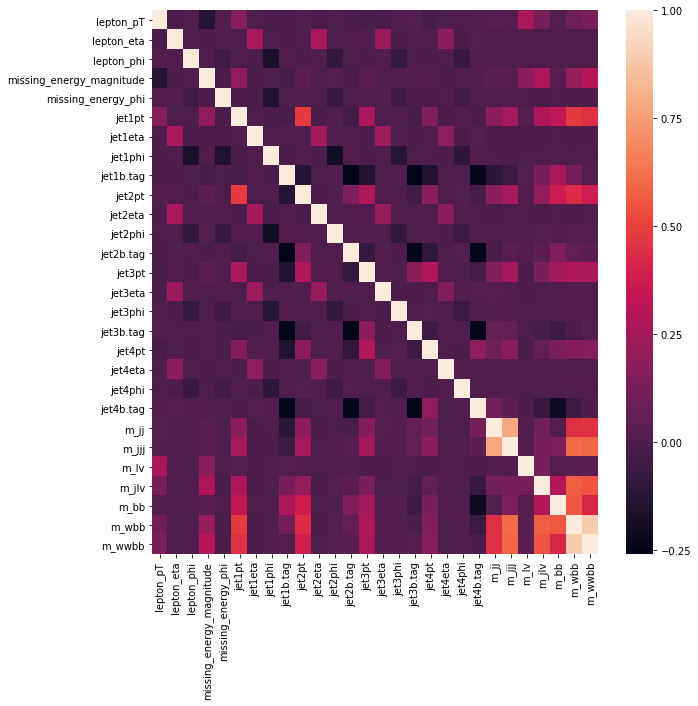

In [273]:
#Visualization
#heatmap for multicollinearity check
float_columns= hb_data.select_dtypes(include='float64').columns
cor=hb_data[float_columns].corr()
plt.figure(figsize = (10,10))
sns.heatmap(cor)
plt.show()

In [274]:
#by checking multi collinearity dropping high collinearity variables
#m_jjj and m_wwbb are causing high multicollinearity
#collinear_columns= ['m_jjj', 'm_wwbb','m_jlv', 'm_bb']
#hb_data= hb_data.drop(collinear_columns, axis=1)
#hb_data_test = hb_data_test.drop(collinear_columns, axis=1)

In [275]:
hb_data["jet1b.tag"].value_counts()

0.000000    33700
2.173076    22387
2.173076     5688
1.086538     5413
1.086538     1448
Name: jet1b.tag, dtype: int64

In [276]:
hb_data["jet2b.tag"].value_counts()

0.000000    34289
2.214872    22294
2.214872     5660
1.107436     5135
1.107436     1258
Name: jet2b.tag, dtype: int64

In [277]:
hb_data["jet3b.tag"].value_counts()

0.000000    39089
2.548224    19626
2.548224     4906
1.274112     3952
1.274112     1063
Name: jet3b.tag, dtype: int64

In [278]:
hb_data["jet4b.tag"].value_counts()

0.000000    44714
3.101961    15800
3.101961     4063
1.550981     3179
1.550981      880
Name: jet4b.tag, dtype: int64

In [279]:
hb_data_test["jet4b.tag"].value_counts()

0.000000    19044
3.101961     8605
1.550981     1764
Name: jet4b.tag, dtype: int64

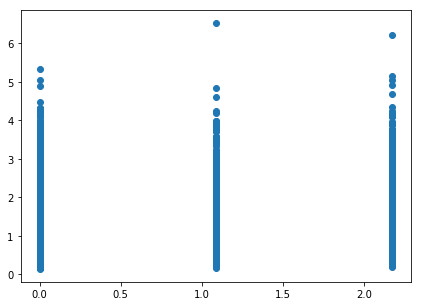

In [280]:
plt.figure(figsize = (7,5))

plt.scatter(x = hb_data['jet1b.tag'],y = hb_data.jet1pt)
#plt.title('Years at company and Age')
#plt.xlabel('YearsAtCompany')
#plt.ylabel('Age')
plt.show()

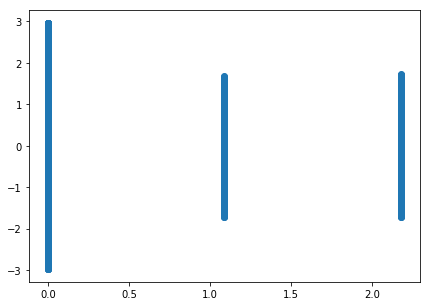

In [281]:
plt.figure(figsize = (7,5))

plt.scatter(x = hb_data['jet1b.tag'],y = hb_data.jet1eta)
#plt.title('Years at company and Age')
#plt.xlabel('YearsAtCompany')
#plt.ylabel('Age')
plt.show()

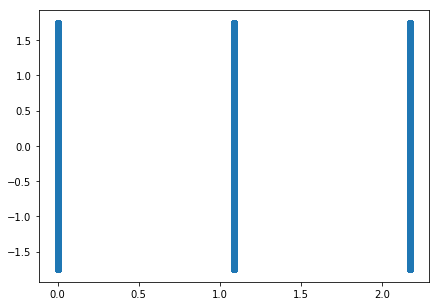

In [282]:
plt.figure(figsize = (7,5))

plt.scatter(x = hb_data['jet1b.tag'],y = hb_data.jet1phi)
#plt.title('Years at company and Age')
#plt.xlabel('YearsAtCompany')
#plt.ylabel('Age')
plt.show()

In [283]:
#sns.pairplot(hb_data)

In [302]:
#dropping tag variables
tag_cols= ['jet1b.tag','jet2b.tag','jet3b.tag', 'jet4b.tag']
hb_data= hb_data.drop(tag_cols,1)
hb_data_test= hb_data_test.drop(tag_cols,1)

In [303]:
train_target=hb_data['class'].copy()
test_target=hb_data_test['class'].copy()
hb_data= hb_data.drop('class', axis=1)
hb_data_test= hb_data_test.drop('class', axis=1)

KeyError: 'class'

In [304]:
hb_data3= hb_data.copy()
hb_data_test3= hb_data_test.copy()

In [ ]:
'''#label encoding
lab_enc = preprocessing.LabelEncoder()
tar = lab_enc.fit_transform(y_train)
tar_val = lab_enc.fit_transform(y_val)'''

In [305]:
#train test splitting
X_train, X_val, y_train, y_val = train_test_split(hb_data3, train_target, test_size = 0.25, random_state = 42)

In [306]:
#standardizing data
float_columns= hb_data3.select_dtypes(include='float64').columns
standardizer = StandardScaler()
standardizer.fit(X_train[float_columns])
X_train[float_columns] = standardizer.transform(X_train[float_columns])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_array(k

In [307]:
#standardizing data
standardizer = StandardScaler()
standardizer.fit(X_val[float_columns])
X_val[float_columns] = standardizer.transform(X_val[float_columns])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

In [308]:
standardizer = StandardScaler()
standardizer.fit(hb_data_test3[float_columns])
hb_data_test3[float_columns] = standardizer.transform(hb_data_test3[float_columns])

In [309]:
#Dummification
X_train= pd.get_dummies(X_train )
X_val= pd.get_dummies(X_val)
hb_data_test3 = pd.get_dummies(hb_data_test3)

In [310]:
print("Modified Train dimensions",X_train.shape)
print("Modified Validation dimensions",X_val.shape)
print("Modified Test dimensions",hb_data_test3.shape)

Modified Train dimensions (51477, 24)
Modified Validation dimensions (17159, 24)
Modified Test dimensions (29413, 24)


In [311]:
X_train.dtypes

lepton_pT                   float64
lepton_eta                  float64
lepton_phi                  float64
missing_energy_magnitude    float64
missing_energy_phi          float64
jet1pt                      float64
jet1eta                     float64
jet1phi                     float64
jet2pt                      float64
jet2eta                     float64
jet2phi                     float64
jet3pt                      float64
jet3eta                     float64
jet3phi                     float64
jet4pt                      float64
jet4eta                     float64
jet4phi                     float64
m_jj                        float64
m_jjj                       float64
m_lv                        float64
m_jlv                       float64
m_bb                        float64
m_wbb                       float64
m_wwbb                      float64
dtype: object

In [312]:
hb_data_test3.dtypes

lepton_pT                   float64
lepton_eta                  float64
lepton_phi                  float64
missing_energy_magnitude    float64
missing_energy_phi          float64
jet1pt                      float64
jet1eta                     float64
jet1phi                     float64
jet2pt                      float64
jet2eta                     float64
jet2phi                     float64
jet3pt                      float64
jet3eta                     float64
jet3phi                     float64
jet4pt                      float64
jet4eta                     float64
jet4phi                     float64
m_jj                        float64
m_jjj                       float64
m_lv                        float64
m_jlv                       float64
m_bb                        float64
m_wbb                       float64
m_wwbb                      float64
dtype: object

# Model buiding


### SVM

In [324]:
from sklearn.svm import SVC # "Support Vector Classifier" 
clf_svm = SVC(kernel='linear', gamma=5) 
  
# fitting x samples and y classes 
clf_svm.fit(X_train, y_train)
predicted_svm = clf_svm.predict(X_train)
preds_val_svm=clf_svm.predict(X_val)
print ('Accuracy:', accuracy_score(y_train, predicted_svm))
print ('Accuracy:', accuracy_score(y_val, preds_val_svm))

Accuracy: 0.6369446548944189
Accuracy: 0.6363424441983798


In [325]:
preds_test_svm=clf_svm.predict(hb_data_test3)
print ('Test Accuracy:', accuracy_score(test_target, preds_test_svm))

Test Accuracy: 0.6363172746744636


In [326]:
print ('Train Classifion Report:\n', classification_report(y_train, predicted_svm))
print ('Val Classifion Report:\n', classification_report(y_val, preds_val_svm))
print ('Test Classifion Report:\n', classification_report(test_target, preds_test_svm))


Train Classifion Report:
              precision    recall  f1-score   support

          0       0.69      0.42      0.52     24286
          1       0.62      0.83      0.71     27191

avg / total       0.65      0.64      0.62     51477

Val Classifion Report:
              precision    recall  f1-score   support

          0       0.68      0.42      0.52      8071
          1       0.62      0.83      0.71      9088

avg / total       0.65      0.64      0.62     17159

Test Classifion Report:
              precision    recall  f1-score   support

          0       0.68      0.43      0.53     13866
          1       0.62      0.82      0.70     15547

avg / total       0.65      0.64      0.62     29413



In [327]:
print ('Train Kappa:', cohen_kappa_score(y_train, predicted_svm))
print ('Val kappa:', cohen_kappa_score(y_val, preds_val_svm))
print ('Test Kappa:', cohen_kappa_score(test_target, preds_test_svm))


Train Kappa: 0.25644613251850124
Val kappa: 0.2542385309813725
Test Kappa: 0.2553838354948952


### Decison Trees

In [481]:
clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 10, min_samples_leaf = 8) 
clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=10, min_samples_leaf=8) 
  
# Performing training 
clf_entropy.fit(X_train, y_train)
clf_gini.fit(X_train, y_train) 

predicted_DT_gini = clf_gini.predict(X_train)
predicted_DT_entropy = clf_entropy.predict(X_train)

preds1_gini=clf_gini.predict(X_val)
preds1_entropy=clf_entropy.predict(X_val)

preds_test_gini=clf_gini.predict(hb_data_test3)
preds_test_entropy = clf_entropy.predict(hb_data_test3)



In [469]:
print ('Accuracy train gini:', accuracy_score(y_train, predicted_DT_gini))
print ('Accuracy val gini:', accuracy_score(y_val, preds1_gini))

print ('Accuracy train entropy:', accuracy_score(y_train, predicted_DT_entropy))
print ('Accuracy val entropy:', accuracy_score(y_val, preds1_entropy))

Accuracy train gini: 0.7426617712764925
Accuracy val gini: 0.6761466285914097
Accuracy train entropy: 0.7391650640091691
Accuracy val entropy: 0.6762049070458651


In [470]:
print ('Accuracy test gini:', accuracy_score(test_target, preds_test_gini))
print ('Accuracy test entropy:', accuracy_score(test_target, preds_test_entropy))


Accuracy test gini: 0.682113351239248
Accuracy test entropy: 0.6824533369598477


In [471]:
print ('Kappa train gini:', cohen_kappa_score(y_train, predicted_DT_gini))
print ('Kappa val gini:', cohen_kappa_score(y_val, preds1_gini))

print ('Kappa train entropy:', cohen_kappa_score(y_train, predicted_DT_entropy))
print ('Kappa val entropy:', cohen_kappa_score(y_val, preds1_entropy))

print ('Test Kappa_gini:', cohen_kappa_score(test_target, preds_test_gini))
print ('Test Kappa_entropy:', cohen_kappa_score(test_target, preds_test_entropy))


Kappa train gini: 0.48327119605857116
Kappa val gini: 0.3493739648048684
Kappa train entropy: 0.4772004843312231
Kappa val entropy: 0.3507210721532541
Test Kappa_gini: 0.36190941076572314
Test Kappa_entropy: 0.36366404461146085


In [474]:
impf_DT=sorted(zip(map(lambda x: round(x, 4), clf_entropy.feature_importances_), X_train.columns), 
             reverse=True)
impf_DT = pd.DataFrame(impf_entropy, index=None)
impf_DT


,0,1
0,0.2822,m_bb
1,0.1426,m_wwbb
2,0.0944,m_wbb
3,0.0806,jet1pt
4,0.0732,m_jlv
5,0.0721,m_jjj
6,0.0447,lepton_pT
7,0.0315,m_jj
8,0.0295,missing_energy_magnitude
9,0.0193,jet2pt


In [494]:
impf1_DT = impf_DT[1]
impf1_DT=impf1_DT[0:7]

In [503]:
clf_entropy1 = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 10, 
            max_depth = 10, min_samples_leaf = 8) 
clf_gini1 = DecisionTreeClassifier(criterion = "gini", 
            random_state = 10,max_depth=10, min_samples_leaf=8) 
  
# Performing training 
clf_entropy1.fit(X_train[impf1_DT], y_train)
clf_gini1.fit(X_train[impf1_DT], y_train) 

predicted_DT_gini1 = clf_gini1.predict(X_train[impf1_DT])
predicted_DT_entropy1 = clf_entropy1.predict(X_train[impf1_DT])

preds1_gini1=clf_gini1.predict(X_val[impf1_DT])
preds1_entropy1=clf_entropy1.predict(X_val[impf1_DT])

preds_test_gini1=clf_gini1.predict(hb_data_test3[impf1_DT])
preds_test_entropy1 = clf_entropy1.predict(hb_data_test3[impf1_DT])



In [504]:
print ('Accuracy train gini:', accuracy_score(y_train, predicted_DT_gini1))
print ('Accuracy val gini:', accuracy_score(y_val, preds1_gini1))

print ('Accuracy train entropy:', accuracy_score(y_train, predicted_DT_entropy1))
print ('Accuracy val entropy:', accuracy_score(y_val, preds1_entropy1))

Accuracy train gini: 0.7351049983487771
Accuracy val gini: 0.6771956407716068
Accuracy train entropy: 0.7301901820230394
Accuracy val entropy: 0.6782446529518037


In [505]:
print ('Accuracy test gini:', accuracy_score(test_target, preds_test_gini1))
print ('Accuracy test entropy:', accuracy_score(test_target, preds_test_entropy1))


Accuracy test gini: 0.682147349811308
Accuracy test entropy: 0.6862951756026247


In [506]:
print ('Kappa train gini:', cohen_kappa_score(y_train, predicted_DT_gini1))
print ('Kappa val gini:', cohen_kappa_score(y_val, preds1_gini1))

print ('Kappa train entropy:', cohen_kappa_score(y_train, predicted_DT_entropy1))
print ('Kappa val entropy:', cohen_kappa_score(y_val, preds1_entropy1))

print ('Test Kappa_gini:', cohen_kappa_score(test_target, preds_test_gini1))
print ('Test Kappa_entropy:', cohen_kappa_score(test_target, preds_test_entropy1))


Kappa train gini: 0.46808450283638936
Kappa val gini: 0.35185925102410476
Kappa train entropy: 0.4580161873415587
Kappa val entropy: 0.35368759563756436
Test Kappa_gini: 0.36197019020651255
Test Kappa_entropy: 0.369858691551472


### Random Forest

In [313]:
#Random Forest
np.random.seed(12345)
clf = RandomForestClassifier(n_estimators=60, criterion='entropy',n_jobs=10, 
                             random_state=1,max_depth=5, max_features=18,bootstrap=True)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features=18, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=10,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [314]:
predicted_rf = clf.predict(X_train)
preds1=clf.predict(X_val)
print ('Train Accuracy:', accuracy_score(y_train, predicted_rf))
print ('Val Accuracy:', accuracy_score(y_val, preds1))


Train Accuracy: 0.688365677875556
Val Accuracy: 0.6831983215805116


In [315]:
preds_test=clf.predict(hb_data_test3)
print ('Test Accuracy:', accuracy_score(test_target, preds_test))

Test Accuracy: 0.6802774283480094


In [316]:
print ('Train Classifion Report:\n', classification_report(y_train, predicted_rf))
print ('Val Classifion Report:\n', classification_report(y_val, preds1))

Train Classifion Report:
              precision    recall  f1-score   support

          0       0.67      0.68      0.67     24286
          1       0.71      0.70      0.70     27191

avg / total       0.69      0.69      0.69     51477

Val Classifion Report:
              precision    recall  f1-score   support

          0       0.66      0.67      0.67      8071
          1       0.70      0.69      0.70      9088

avg / total       0.68      0.68      0.68     17159



In [317]:
print ('Test Classifion Report:\n', classification_report(test_target, preds_test))

Test Classifion Report:
              precision    recall  f1-score   support

          0       0.66      0.67      0.67     13866
          1       0.70      0.69      0.69     15547

avg / total       0.68      0.68      0.68     29413



In [318]:
print ('Train Kappa:', cohen_kappa_score(y_train, predicted_rf))
print ('Val kappa:', cohen_kappa_score(y_val, preds1))

Train Kappa: 0.3753281752042569
Val kappa: 0.3649291187893111


In [319]:
print ('Test Kappa:', cohen_kappa_score(test_target, preds_test))

Test Kappa: 0.359333647712449


In [329]:
impf=sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), X_train.columns), 
             reverse=True)
impf = pd.DataFrame(impf, index=None)
impf

,0,1
0,0.4409,m_bb
1,0.1662,m_wwbb
2,0.1364,m_wbb
3,0.0780,m_jjj
4,0.0695,jet1pt
5,0.0555,m_jlv
6,0.0225,missing_energy_magnitude
7,0.0105,lepton_pT
8,0.0104,jet2pt
9,0.0056,m_jj


In [431]:
impf1 = impf[1]
impf1=impf1[0:18]

In [448]:
np.random.seed(11111)

In [456]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf1 = RandomForestClassifier(n_estimators=100, criterion='gini',n_jobs=10, 
                             random_state=3,max_depth=10, max_features=12,bootstrap=True, 
                             min_samples_leaf=4,oob_score=True)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)

clf1.fit(X_train[impf1], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=12, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=10,
            oob_score=True, random_state=3, verbose=0, warm_start=False)

In [457]:
predicted_rf1 = clf1.predict(X_train[impf1])
preds2=clf1.predict(X_val[impf1])
print ('Train Accuracy:', accuracy_score(y_train, predicted_rf))
print ('Val Accuracy:', accuracy_score(y_val, preds1))


Train Accuracy: 0.688365677875556
Val Accuracy: 0.6831983215805116


In [458]:
preds_test1=clf1.predict(hb_data_test3[impf1])
print ('Test Accuracy:', accuracy_score(test_target, preds_test1))

Test Accuracy: 0.710264168904906


In [459]:
print ('Train Classifion Report:\n', classification_report(y_train, predicted_rf1))
print ('Val Classifion Report:\n', classification_report(y_val, preds2))

Train Classifion Report:
              precision    recall  f1-score   support

          0       0.78      0.77      0.77     24286
          1       0.79      0.81      0.80     27191

avg / total       0.79      0.79      0.79     51477

Val Classifion Report:
              precision    recall  f1-score   support

          0       0.70      0.69      0.69      8071
          1       0.73      0.73      0.73      9088

avg / total       0.71      0.71      0.71     17159



In [460]:
print ('Test Classifion Report:\n', classification_report(test_target, preds_test1))

Test Classifion Report:
              precision    recall  f1-score   support

          0       0.69      0.69      0.69     13866
          1       0.73      0.73      0.73     15547

avg / total       0.71      0.71      0.71     29413



In [461]:
print ('Train Kappa:', cohen_kappa_score(y_train, predicted_rf1))
print ('Val kappa:', cohen_kappa_score(y_val, preds2))

Train Kappa: 0.5757861597372083
Val kappa: 0.42644260585849403


In [462]:
print ('Test Kappa:', cohen_kappa_score(test_target, preds_test1))

Test Kappa: 0.4186702015643772
